# Python: Plotting with `matplotlib`
[`matplotlib`](https://matplotlib.org/index.html) is a plotting library for Python that builds heavily on NumPy. This package can be used to make publication-quality plots and graphics and is highly customizable. While `matplotlib` is one of the most well-established Python plotting libraries, there are a number of other plotting packages that you may find useful for your work:
- [`Seaborn`](https://seaborn.pydata.org/). Creates beautiful plots easily and is built on `matplotlib`
- [`plotly`](https://plot.ly/python/getting-started/). Powerful library for interactive plots, which are free for offline use (and there is a paid plan for use on the web).
- [`ggplot`](http://ggplot.yhathq.com/). For lovers of R's plotting system, `ggplot2`, this library translates much of that functionality from R to Python. It's based on the "Grammar of Graphics" theory of data visualization.
- [`Bokeh`](http://bokeh.pydata.org/en/latest/). An interactive visualization library that targets the web for presentation.

## Required Reading
Please read the [matplotlib tutorial](https://matplotlib.org/users/pyplot_tutorial.html). Another resource that is not required reading, but that you may find helpful is the [plot-specific `matplotlib` tutorials](https://matplotlib.org/tutorials/index.html) which provide guidance in terms of how to create specific plot types.

# Practical Examples

The example below are mean to challenge you to use the tool from NumPy and matplotlib to construct a number of plots. Go to Spyder and try to work through these on your own (searching online for documentation that may help you figure out what function you may need to accomplish the task - this is how a great deal of programming happens). If you get stuck check the solutions below. These are meant to be challenging, to encourage you to stretch yourself beyond the simpler examples from the reading. It's OK if you don't get every single line of code, as long a you get the overall approach of these exercises and are able to replicate a number of the steps below.

## Exercise 1
This exercise will walk through some basic numerical programming exercises. If you get stuck on the statistics or the concept, use this as a learning opportunity to explore that idea. Much of what's asked for here is a built-in function in NumPy or matplotlib.

1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call these observations from a random variable $X$, and call the vector of observations that you generate, $\textbf{x}$.
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures.
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found.
5. What is the 99th percentile of $\textbf{x}$?
6. Now synthesize $n=10^4$ normally distributed data points with mean $\mu=0$ and a standard deviation of $\sigma=3$. Call these observations from a random variable $Y$, and call the vector of observations that you generate, $\textbf{y}$.
7. Plot the histogram of the data in $\textbf{y}$ on a (new) plot with the histogram of $\textbf{x}$, so that both histograms can be seen and compared.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12) # This ensures that random numbers will be reproducible

# 1. Synthesize data x
print('1.)')
x = np.random.randn(10000) + 2
print('Examples from x: {}'.format(x[0:5]))

1.)
Examples from x: [ 2.47298583  1.31857412  2.2424395   0.29926437  2.75314283]


In [2]:
# 2. Calculate the mean and standard deviation
print('\n2.)')
print('x_mean = {:.4}'.format(x.mean()))
print('x_std  = {:.4}'.format(x.std()))


2.)
x_mean = 1.988
x_std  = 0.9943



3.)


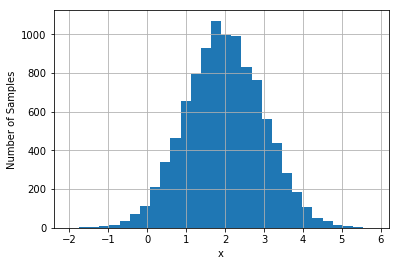

In [3]:
# 3. Plot a historgram of x with 30 bins
print('\n3.)')
plt.hist(x,bins=30)
plt.xlabel('x')
plt.ylabel('Number of Samples')
plt.grid('on')
plt.show()

In [4]:
# 4. Compute the 90th percentile of x
print('\n4.)')
percentile90 = np.percentile(x,90)
print('90th percentile = {:.4}'.format(percentile90))


4.)
90th percentile = 3.267


In [5]:
# 5. Compute the 99th percentile of x
print('\n5.)')
percentile99 = np.percentile(x,99)
print('90th percentile = {:.4}'.format(percentile99))


5.)
90th percentile = 4.319


In [6]:
# 6. Synthesize the vector y
print('\n6.)')
y = 3*np.random.randn(10000)
print('Examples from y: {}'.format(y[0:5]))


6.)
Examples from y: [ 4.04422192  3.85535993  0.99711177  1.55658765 -3.88588689]



7.)


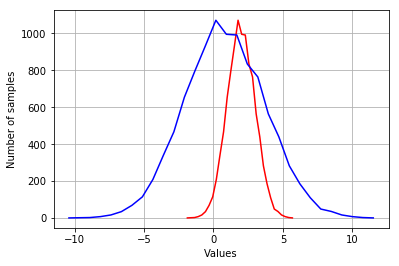

In [7]:
# 7. Plot the histogram of the data in x and y on one plot and compare
print('\n7.)')
histx, binsx = np.histogram(x, bins=30)
histy, binsy = np.histogram(y, bins=30)
centerx = (binsx[:-1] + binsx[1:]) / 2
centery = (binsy[:-1] + binsy[1:]) / 2
plt.plot(centerx,histx,'r-',label='x')
plt.plot(centery,histx,'b-',label='y')
plt.xlabel('Values')
plt.ylabel('Number of samples')
plt.grid('on')
plt.show()

## Exercise 2

The function below computes the function $f(x,y) = x^2 - 2 y^2$ and determines whether this quantity is above a given threshold, which here we'll set to `thresh=0`. This is done for $x,y in the range of \{-4,4\}$, over a 2,000-by-2,000 grid covering that domain.

Plot the the function $f(x,y)$ and the thresholded output - using [`imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) from `matplotlib`.

*Hint: look at the `numpy` [`meshgrid`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) documentation*

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

nvalues = 2000
xvalues = np.linspace(-4,4,nvalues)
yvalues = np.linspace(-4,4,nvalues)
thresh  = 0

# Generate the data
X,Y = np.meshgrid(xvalues,yvalues)
F = X**2 - 2 * Y**2
F_threshold = F > thresh

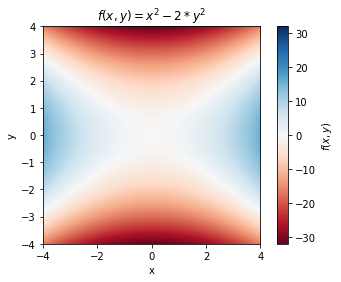

In [9]:
# ---------------------------------------
# Function plotting 
# ---------------------------------------
# Plot the function f(x,y)
plot1 = plt.imshow(F, extent=(-4,4,-4,4), cmap='RdBu')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) = x^2 - 2 * y^2$')
color_bar_max = max([F.max(), abs(F.min())])
plt.gcf().colorbar(plot1, label='$f(x,y)$')
plot1.set_clim(-color_bar_max,color_bar_max)
plt.show()

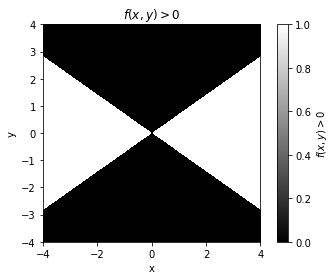

In [10]:
# Plot the thresholded output f(x,y) > 0
plot2 = plt.imshow(F_threshold, extent=(-4,4,-4,4), cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) > 0$')
plt.gcf().colorbar(plot2, label='$f(x,y) > 0$')
plt.show()

## Next
The last topic to cover is a data analysis tool the brings together the strengths of both NumPy and matplotlib to make working with data significantly easier. This package is called pandas.